In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

# 1: Implement lại các loss và r_squared bằng numpy

In [3]:
def mse(y_true: np.array, y_pred: np.array):
    n = len(y_true)
    mse = np.sum(np.square(y_pred - y_true))/n
    return mse

def rmse(y_true: np.array, y_pred: np.array):
    n = len(y_true)
    mse = np.sum(np.square(y_pred - y_true))/n
    rmse = np.sqrt(mse)
    return rmse

def mae(y_true: np.array, y_pred: np.array):
    n = len(y_true)
    mae = np.sum(np.abs(y_pred - y_true))/n
    return mae    

def mape(y_true: np.array, y_pred: np.array):
    n = len(y_true)
    mape = np.sum(np.abs((y_pred - y_true)/y_true))/n * 100
    return mape


In [4]:
# Các bạn có thể thử với dữ liệu ở đây
a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))
print('\n\n')

1.0
1.0
0.6
26.666666666666668





# 2: Implement lại Ridge Regression

In [5]:
class RidgeRegression:
    def __init__(self,X,y,lambda_):
      self.w = None
      self._X = X
      self._y = y
      self._lambda = lambda_         
    
    def fit(self, X, y, lambda_ = 0.1):
      X = np.hstack((np.ones((X.shape[0], 1)), X))
      n_features = X.shape[1] #
      XtX = X.T.dot(X)
      I = np.eye(n_features)#an identity matrix of shape (n_features, n_features), where n_features is the number of features in the input data
      I[0, 0] = 0 #By setting it to 0, we do not penalize the bias term and only regularize the coefficients of the other features.
      self.w = np.linalg.inv(XtX + lambda_ * I).dot(X.T).dot(y)             
       
    def predict(self, new_X):
      new_X = np.hstack((np.ones((new_X.shape[0], 1)), new_X))
      y_pred = new_X.dot(self.w)
      return y_pred

#3: Tạo dữ liệu toy_data

In [6]:
def create_toy_data(func, sample_size=100, standard_deviation=0.25):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=standard_deviation, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

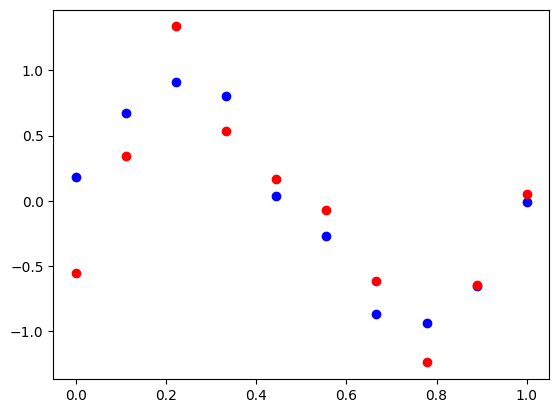

In [7]:

x_train, t_train = create_toy_data(func, sample_size=10)
plt.scatter(x_train, t_train, color='blue',label='Train data')

x_val, t_val = create_toy_data(func, sample_size=10)
plt.scatter(x_val,t_val, color='red',label=' Validate data')



# 3b: Lần lượt fit các model đa thức bậc 0, 1, 2,...,9

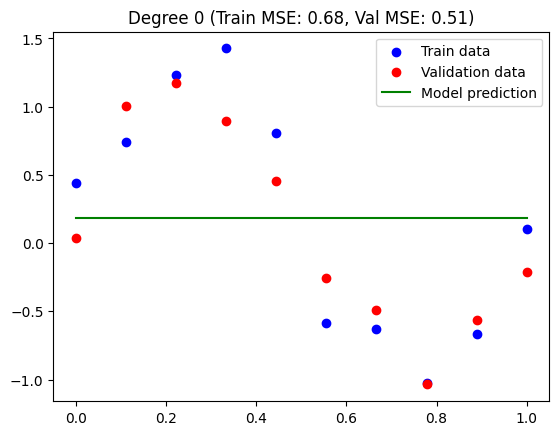

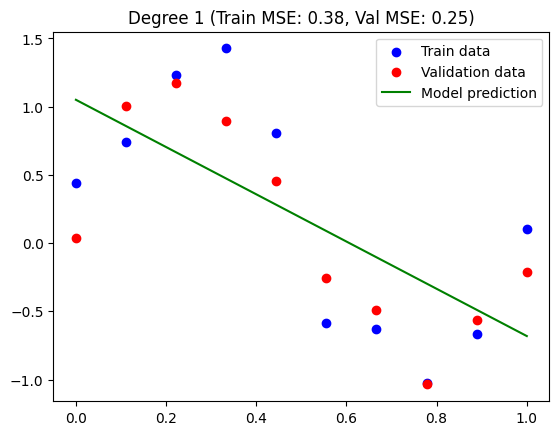

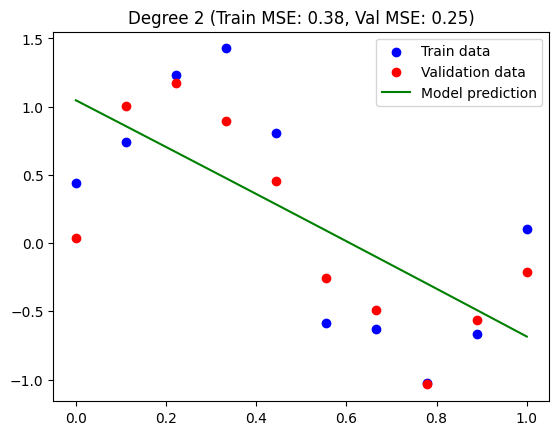

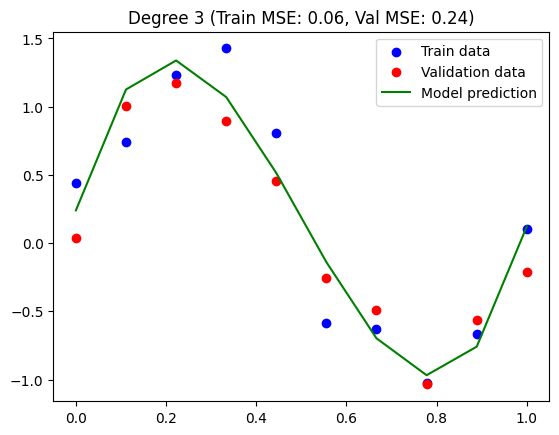

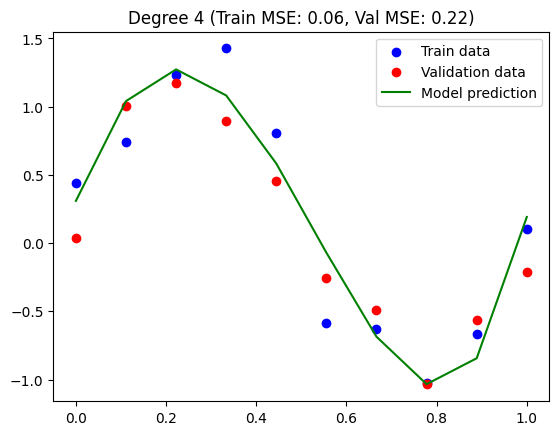

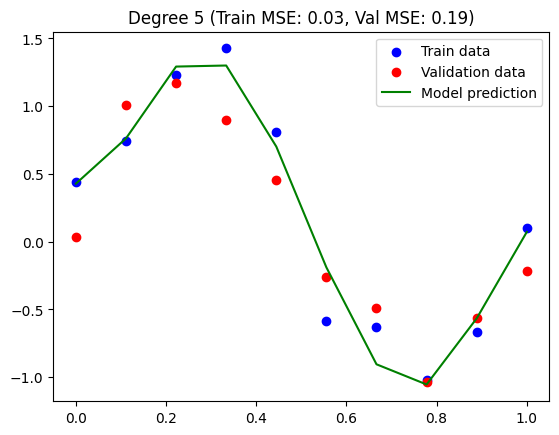

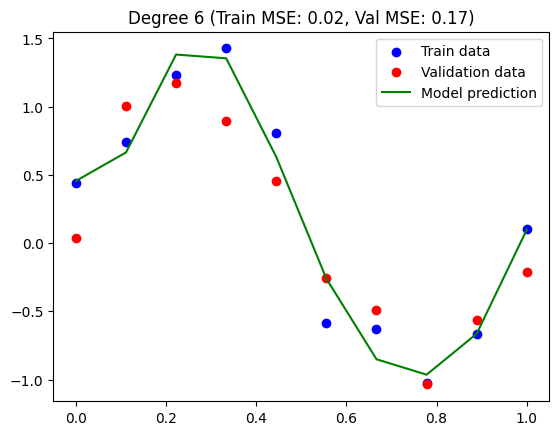

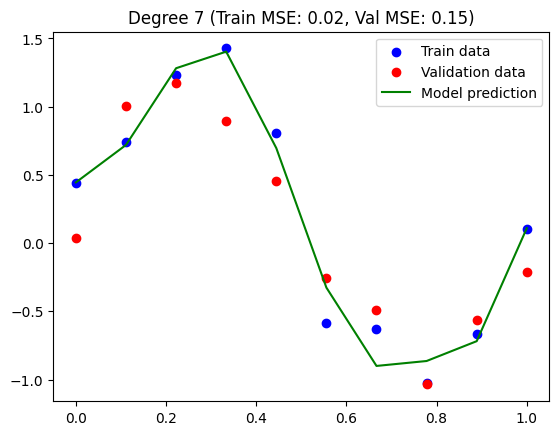

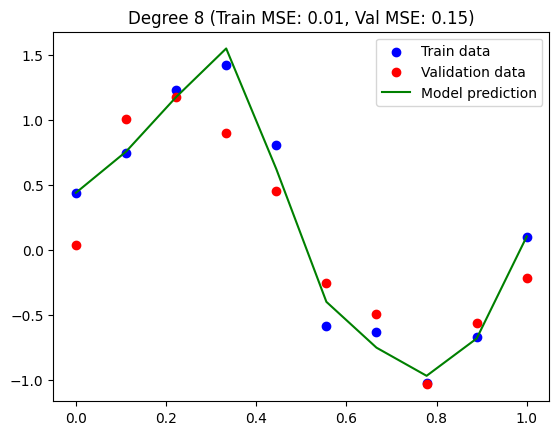

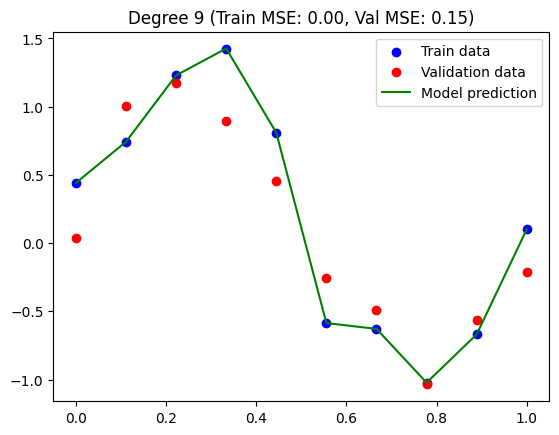

In [8]:
# code here
np.random.seed(0)
x_train, t_train = create_toy_data(func, sample_size=10)
x_val, t_val = create_toy_data(func, sample_size=10)

for degree in range(10):
    X_train = np.vander(x_train, degree+1, increasing=True)
    X_val = np.vander(x_val, degree+1, increasing=True)

    # fit model on train data
    w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(t_train)
    ridge_reg = RidgeRegression(X_train, t_train, lambda_=0.1)
    ridge_reg.fit(X_train, t_train)

    # evaluate model on train data
    train_pred = X_train.dot(w)
    train_mse = np.mean((t_train - train_pred)**2)

    # evaluate model on validation data
    val_pred = ridge_reg.predict(X_val)
    val_mse = np.mean((t_val - val_pred)**2)

    # plot model prediction and data points
    plt.figure()
    plt.scatter(x_train, t_train, color='blue', label='Train data')
    plt.scatter(x_val, t_val, color='red', label='Validation data')
    plt.plot(x_train, train_pred, color='green', label='Model prediction')
    plt.title(f'Degree {degree} (Train MSE: {train_mse:.2f}, Val MSE: {val_mse:.2f})')
    plt.legend()
    plt.show()

## Nhận xét
Mô hình bị underfitting nếu MSE trên cả tập train và tập  validation đều cao: degree 0,1,2. 
Mô hình bị overfitting nếu MSE trên tập train thấp, nhưng trên tập validation lại cao: degree 9, 8,7,6.
MSE càng thấp thì mô hình càng tốt, nên cần tìm mô hình với MSE thấp nhất trên tập validation.

# 3c: Với mỗi mô hình, tính loss train/val và nhận xét xem mô hình bị overfitting hay underfitting.

In [9]:
# code hereabove

## Nhận xét

# 3d: visualize model với đa thức bậc 1, 3, 6, 9

In [10]:
# code here

## Nhận xét

# 4: Với model đa thức bậc 9, mô hình bị overfitting, thử các cách sau để tránh overfitting:

# 4a: Tăng tập train thêm 10 điểm dữ liệu

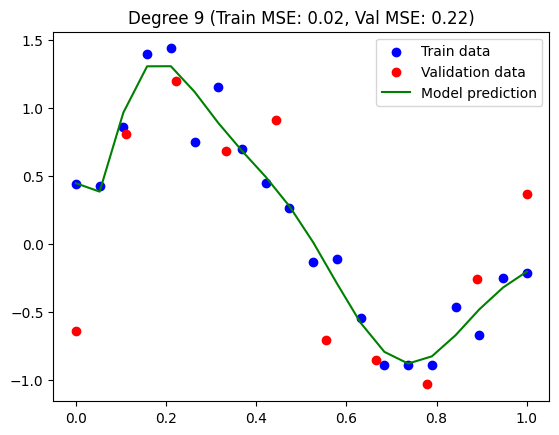

In [11]:
np.random.seed(0)
x_train, t_train = create_toy_data(func, sample_size=20)  
x_val, t_val = create_toy_data(func, sample_size=10)

degree = 9
X_train = np.vander(x_train, degree+1, increasing=True)
X_val = np.vander(x_val, degree+1, increasing=True)

# fit model on train data
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(t_train)
ridge_reg = RidgeRegression(X_train, t_train, lambda_=0.1)
ridge_reg.fit(X_train, t_train)

# evaluate model on train data
train_pred = X_train.dot(w)
train_mse = np.mean((t_train - train_pred)**2)

# evaluate model on validation data
val_pred = X_val.dot(w)
val_mse = np.mean((t_val - val_pred)**2)

# plot model prediction and data points
plt.figure()
plt.scatter(x_train, t_train, color='blue', label='Train data')
plt.scatter(x_val, t_val, color='red', label='Validation data')
plt.plot(x_train, train_pred, color='green', label='Model prediction')
plt.title(f'Degree {degree} (Train MSE: {train_mse:.2f}, Val MSE: {val_mse:.2f})')
plt.legend()
plt.show()





# 4b: Tăng tập train thêm 90 điểm dữ liệu

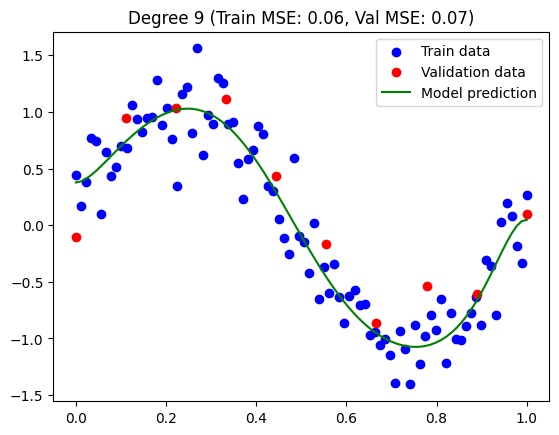

In [12]:
np.random.seed(0)
x_train, t_train = create_toy_data(func, sample_size=90)  
x_val, t_val = create_toy_data(func, sample_size=10)

degree = 9
X_train = np.vander(x_train, degree+1, increasing=True)
X_val = np.vander(x_val, degree+1, increasing=True)

# fit model on train data
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(t_train)
ridge_reg = RidgeRegression(X_train, t_train, lambda_=0.1)
ridge_reg.fit(X_train, t_train)

# evaluate model on train data
train_pred = X_train.dot(w)
train_mse = np.mean((t_train - train_pred)**2)

# evaluate model on validation data
val_pred = X_val.dot(w)
val_mse = np.mean((t_val - val_pred)**2)

# plot model prediction and data points
plt.figure()
plt.scatter(x_train, t_train, color='blue', label='Train data')
plt.scatter(x_val, t_val, color='red', label='Validation data')
plt.plot(x_train, train_pred, color='green', label='Model prediction')
plt.title(f'Degree {degree} (Train MSE: {train_mse:.2f}, Val MSE: {val_mse:.2f})')
plt.legend()
plt.show()

#4c: thử Ridge regression implement ở trên với các giá trị $\lambda$ khác nhau (0.1, 1, 10,...) xem giá trị nào tránh overfitting tốt nhất.

In [13]:
np.random.seed(0)
x_train, t_train = create_toy_data(func, sample_size=10)
x_val, t_val = create_toy_data(func, sample_size=10)

degree = 9
X_train = np.vander(x_train, degree+1, increasing=True)
X_val = np.vander(x_val, degree+1, increasing=True)

lambdas = [0.1, 1, 10, 100, 1000]
min_val_mse = float('inf')
best_lambda = None

for lambda_ in lambdas:
    # initialize Ridge Regression object and fit the data
    ridge_reg = RidgeRegression(X_train, t_train, lambda_)
    ridge_reg.fit(X_train, t_train)

    # make predictions on validation data
    val_pred = ridge_reg.predict(X_val)
    val_mse = np.mean((t_val - val_pred)**2)
    
    # update best lambda and minimum validation MSE
    if val_mse < min_val_mse:
        min_val_mse = val_mse
        best_lambda = lambda_


# train the model using the best lambda
ridge_reg = RidgeRegression(X_train, t_train, best_lambda)
ridge_reg.fit(X_train, t_train)

# make predictions on new data
new_X = np.random.rand(10, 6)
new_X_vander = np.vander(new_X.flatten(), degree+1, increasing=True)
y_pred = ridge_reg.predict(new_X_vander)

print(f"Best lambda: {best_lambda}, Best validation MSE: {min_val_mse:.2f}")



Best lambda: 0.1, Best validation MSE: 0.15
